In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df = pd.read_csv("bank_marketing_part1_Data.csv")
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [4]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [5]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [6]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

###### Univariate Analysis

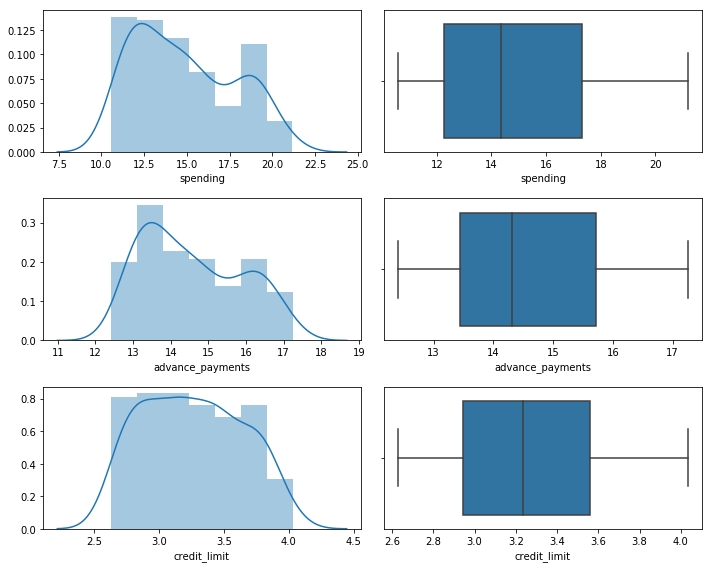

In [7]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,8)
sns.distplot(df['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=df, ax=axes[0][1])
sns.distplot(df['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=df , ax=axes[1][1])
sns.distplot(df['credit_limit'] , kde=True, ax=axes[2][0])
sns.boxplot(x='credit_limit', data=df , ax=axes[2][1])
plt.tight_layout()
plt.show()


###### Insights

From the above chart(displot and boxplot),  there are no outliers.

###### Bi-variate analysis


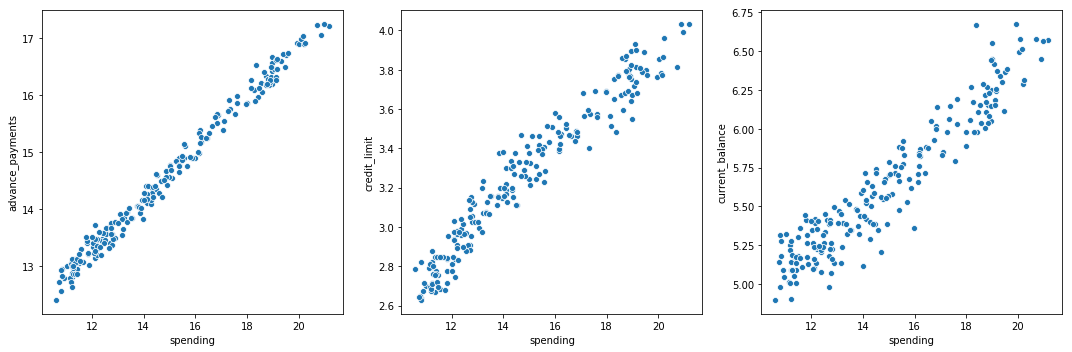

In [8]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(15,5)
# plt.figure(figsize=(12,7))
sns.scatterplot(df['spending'], df['advance_payments'], ax=axes[0])
sns.scatterplot(df['spending'], df['credit_limit'], ax=axes[1])
sns.scatterplot(df['spending'], df['current_balance'], ax=axes[2])
plt.tight_layout()
plt.show()

###### Insights
From the scatterplot, we can infer that as the 'spending' increases, the 'advance_payments','credit_limit','current_balance' increases.
From this, the customer has the high 'current_balance' have the 'spendings' higher.

###### Multi-variate Analysis

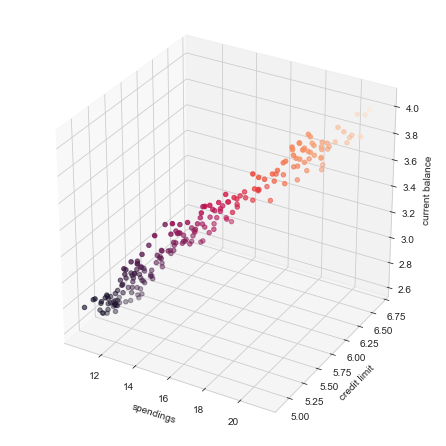

In [9]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)
ax.scatter(df['spending'], df['current_balance'], df['credit_limit'], c=df['spending'], marker='o')
ax.set_xlabel('spendings')
ax.set_ylabel('credit limit')
ax.set_zlabel('current balance')

plt.show()

###### Insights

From this 3D Scatter plot, we can infer that, If the spending increases, the credit limit and current balance also increases.

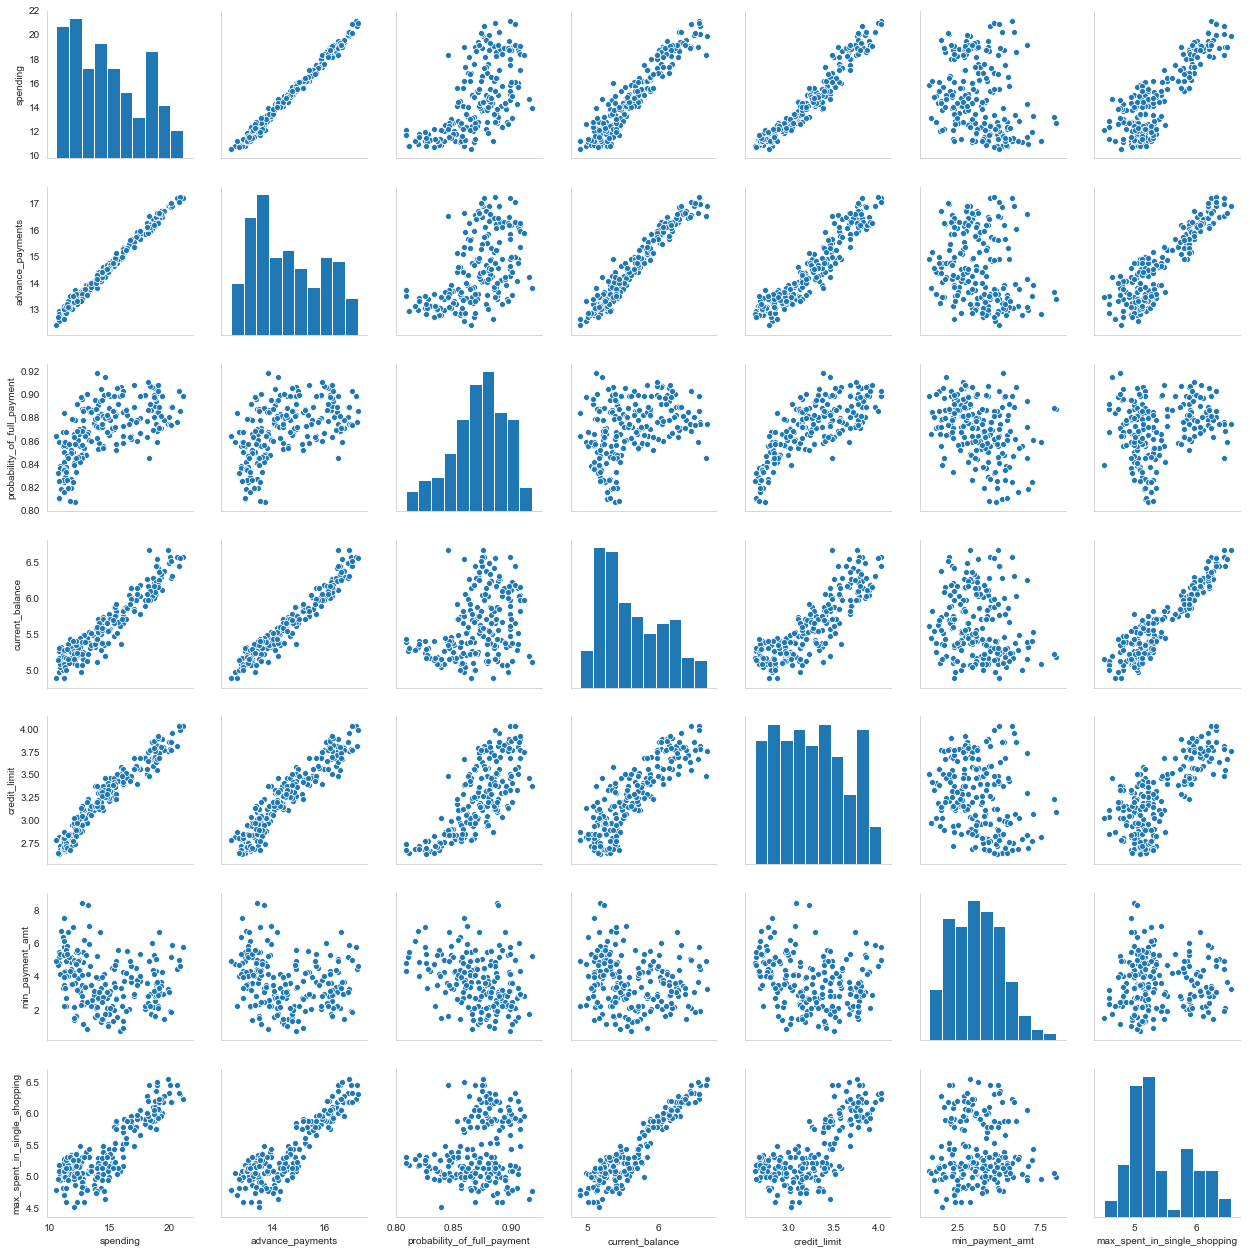

In [10]:
sns.pairplot(df)
plt.tight_layout
plt.show()

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

###### Before Scaling

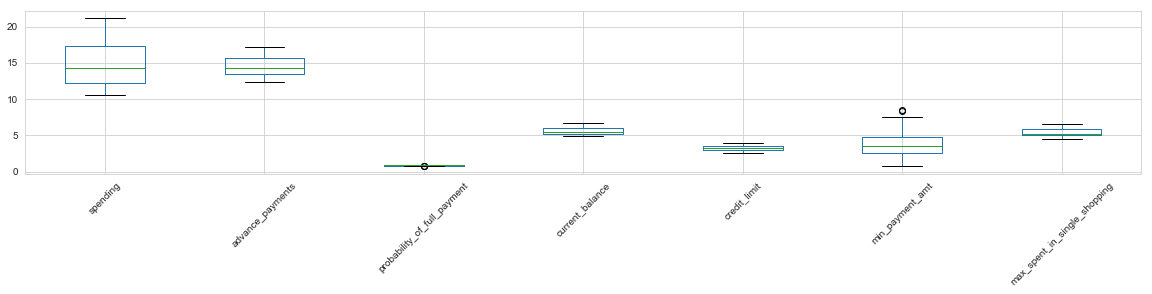

In [11]:
#Check for presence of outliers in each feature
df.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [12]:
#Scale the data
from scipy.stats import zscore
df_scaled = df.apply(zscore)

###### After Scaling

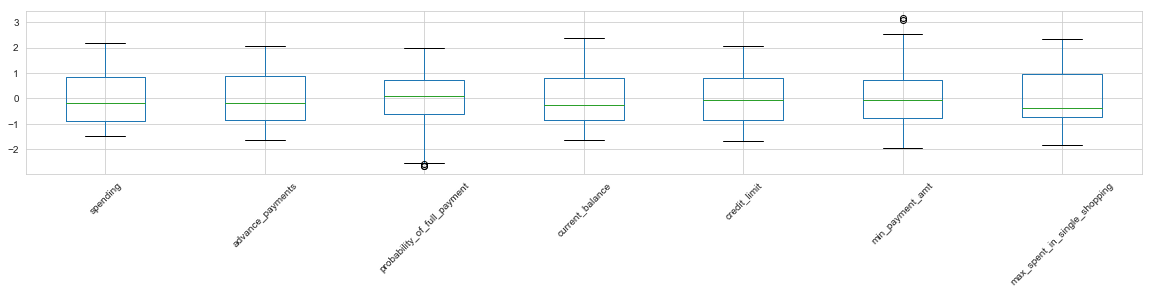

In [13]:
#Check for presence of outliers in each feature
df_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

Yes,Scaling needs to be done as the values of the variables are different.
spending, advance_payments are in different values and this may get more weightage.
Also have shown below the plot of the data prior and after scaling.
Scaling will have all the values in the relative same range.
I have used zscore to standarised the data to relative same scale -3 to +3.

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
wardlink = linkage(df_scaled, method = 'ward')

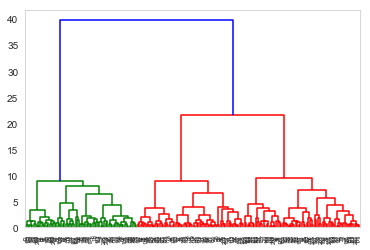

In [16]:
dend = dendrogram(wardlink)

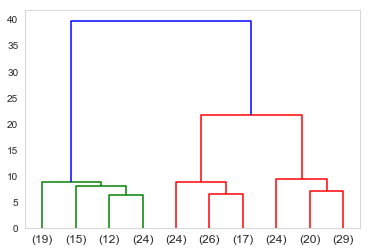

In [17]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [18]:
from scipy.cluster.hierarchy import fcluster

In [19]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

The cluster grouping linkage based on the dendrogram, 3 or 4 looks good. The further analysis, and based on the dataset had gone for 3 linkage solution based on the hierarchical clustering.

In [20]:
df['hierarchial_clusters'] = clusters

In [21]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hierarchial_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [22]:
df['hierarchial_clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: hierarchial_clusters, dtype: int64

In [23]:
mean_cluster_count=df.groupby('hierarchial_clusters').mean()
mean_cluster_count['Freq_hierarchial_clusters']=df['hierarchial_clusters'].value_counts().sort_index()
mean_cluster_count

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq_hierarchial_clusters
hierarchial_clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


From this hierarchical clustering, we can infer that high Spending has been done with medium frequency. Moderate spending of customer are high with frequency when compared with other clusters.

###### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [24]:
from sklearn.cluster import KMeans

In [25]:
wss =[]
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694,
 193.2835133180646,
 182.97995389115258,
 175.11842017053073,
 166.02965682631788]

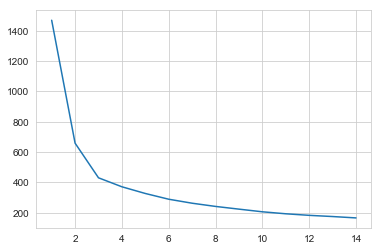

In [26]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

In [27]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
labels = k_means.labels_

In [28]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hierarchial_clusters,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [30]:
silhouette_score(df_scaled,labels)

0.4007270552751299

In [31]:
sil_width = silhouette_samples(df_scaled,labels)
sil_width

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [32]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hierarchial_clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.362276


In [33]:
silhouette_samples(df_scaled,labels).min()

0.002713089347678533

From the elbow curve and the silhouette sample output 3 is the ideal clusters for the data.

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [34]:
mean_Clus_kmeans_count=df.groupby('Clus_kmeans').mean()
mean_Clus_kmeans_count['Freq_Clus_kmeans']=df['Clus_kmeans'].value_counts().sort_index()
mean_Clus_kmeans_count = mean_Clus_kmeans_count.sort_index()
mean_Clus_kmeans_count

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hierarchial_clusters,sil_width,Freq_Clus_kmeans
Clus_kmeans,,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.397473,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468772,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.339816,71


In [35]:
count  = mean_Clus_kmeans_count['Freq_Clus_kmeans'].count()
Clus_kmeans_perc = []
for i in range(count):
    print(mean_Clus_kmeans_count['Freq_Clus_kmeans'][i],"->",i)
    value = (mean_Clus_kmeans_count['Freq_Clus_kmeans'][i]/mean_Clus_kmeans_count['Freq_Clus_kmeans'].sum())*100
    Clus_kmeans_perc.append(round(value,2))
print(Clus_kmeans_perc)

72 -> 0
67 -> 1
71 -> 2
[34.29, 31.9, 33.81]


In [36]:
Clus_kmeans = pd.DataFrame(df['Clus_kmeans'].value_counts().sort_index())
Clus_kmeans.sort_index()
Clus_kmeans['Clus_kmeans_percentage'] = Clus_kmeans_perc
mean_Clus_kmeans_count['Clus_kmeans_percentage'] = Clus_kmeans_perc
Clus_kmeans

,Clus_kmeans,Clus_kmeans_percentage
0,72,34.29
1,67,31.90
2,71,33.81


In [37]:
mean_Clus_kmeans_count.T

Clus_kmeans,0,1,2
spending,11.856944,18.495373,14.437887
advance_payments,13.247778,16.203433,14.337746
probability_of_full_payment,0.848253,0.884210,0.881597
current_balance,5.231750,6.175687,5.514577
credit_limit,2.849542,3.697537,3.259225
min_payment_amt,4.742389,3.632373,2.707341
max_spent_in_single_shopping,5.101722,6.041701,5.120803
hierarchial_clusters,2.083333,1.029851,2.873239
sil_width,0.397473,0.468772,0.339816
Freq_Clus_kmeans,72.000000,67.000000,71.000000


Inference from the above, Group 2 has the highest spending, whereas Group 1 has the least spending.

###### Promotional offer High spending group.

- Giving any reward points might increase their purchases.
- Maximum "max_spent_in_single_shopping" is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase their credit limit
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxury brands, which will drive more "one_time_maximum" spending

###### Promotional offer Medium spending group

- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Increase spending habits by trying with premium Travel tickets, luxurious stay as this will encourage them to spend more

###### Promotional offer Low spending group

- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.


## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)..

In [38]:
df = pd.read_csv('insurance_part2_data.csv')
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [40]:
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [41]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [42]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [43]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups].head()

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA


Removing Duplicate values as there is no Unique value in each record

In [44]:
df.drop_duplicates(keep=False,inplace=True)
print('Number of duplicate rows = %d' % (df.duplicated().sum()))

Number of duplicate rows = 0


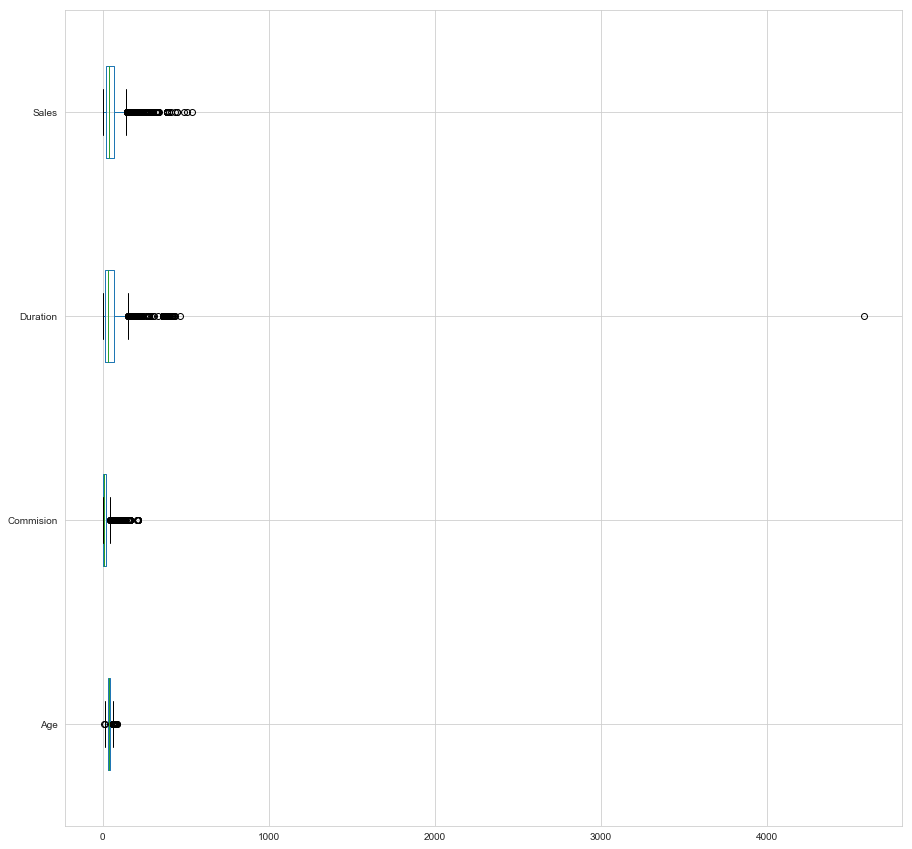

In [45]:
plt.figure(figsize=(15,15))
df[['Age','Commision','Duration','Sales']].boxplot(vert=0)

In [46]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [47]:
for feature in df[['Age','Commision','Duration','Sales']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

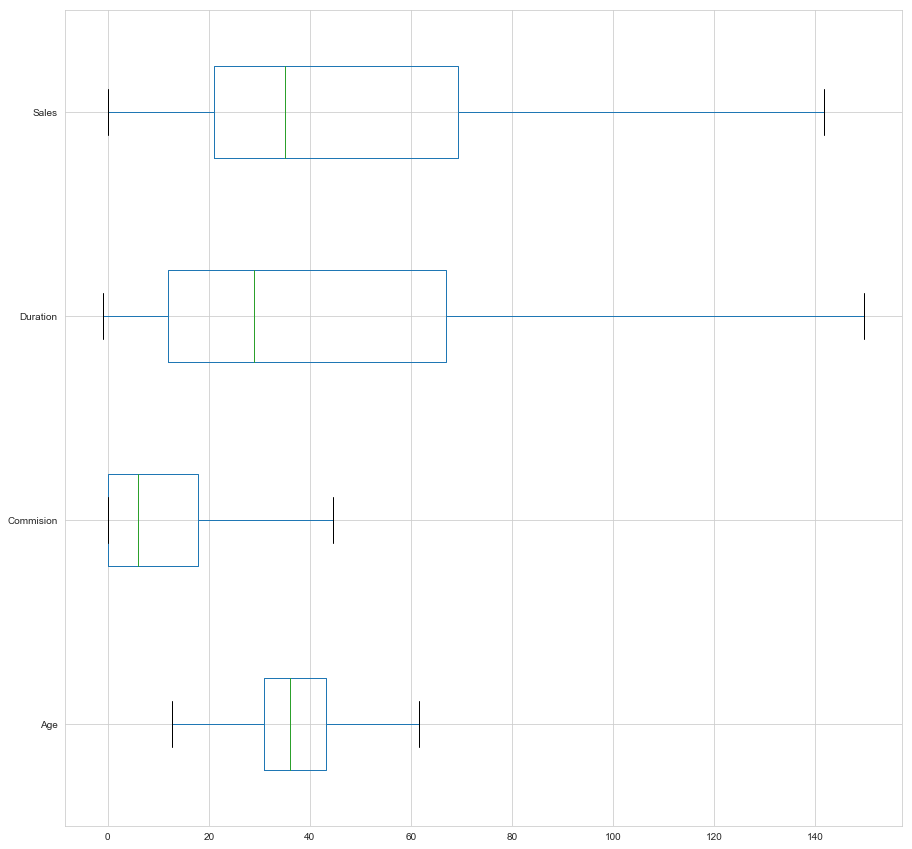

In [48]:
plt.figure(figsize=(15,15))
df[['Age','Commision','Duration','Sales']].boxplot(vert=0)

###### Uni-variate Analysis

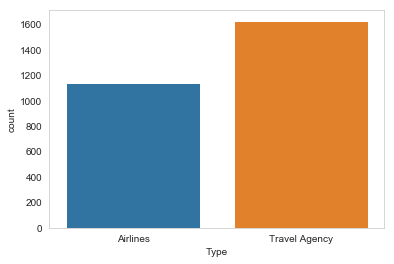

In [49]:
sns.countplot(data = df, x = 'Type')

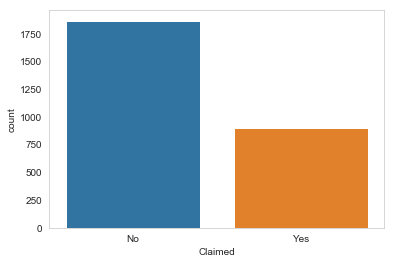

In [50]:
sns.countplot(data = df, x = 'Claimed')

### Bi-variate Analysis

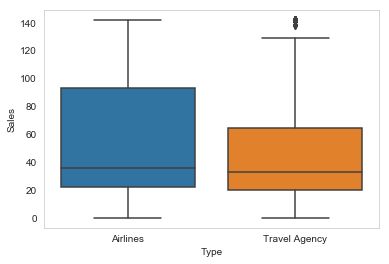

In [51]:
sns.boxplot(data = df, x='Type',y='Sales')

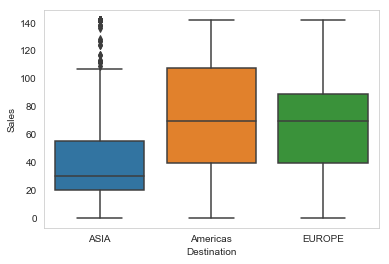

In [52]:
sns.boxplot(data = df, x='Destination',y='Sales')

### Multi-variate Analysis

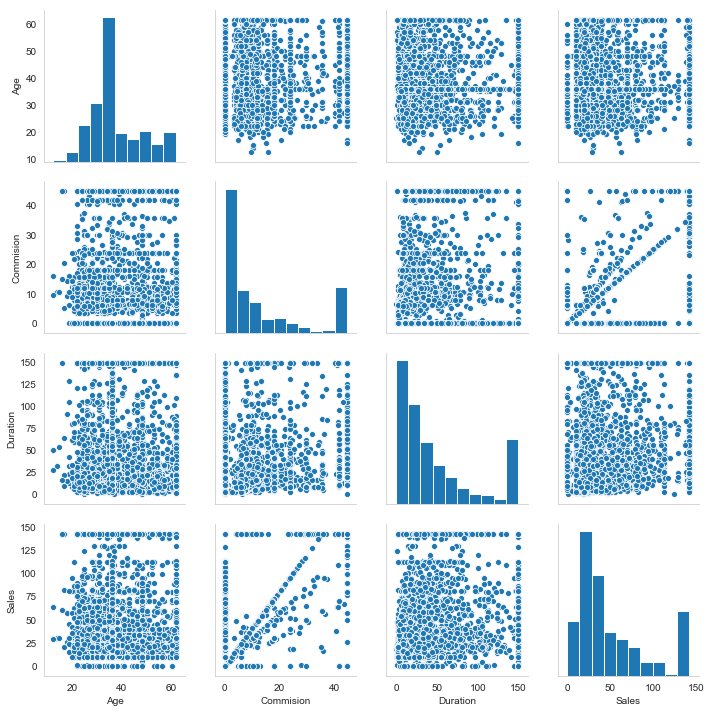

In [53]:
sns.pairplot(df)
plt.show()

In [54]:
df.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.070555,0.006133,0.019696
Commision,0.070555,1.000000,0.443685,0.675476
Duration,0.006133,0.443685,1.000000,0.525765
Sales,0.019696,0.675476,0.525765,1.000000


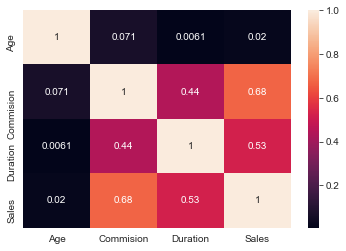

In [55]:
sns.heatmap(df.corr(),annot=True)

From the above pairplot and Correlation, we can infer that, the Strong correlation is between the sales and commission. And weak correlation is between the Age and Duration

In [56]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, CWT, EPX, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 1 2 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 0 to 2999
Data columns (total 10 columns):
Age             2772 non-null float64
Agency_Code     2772 non-null int8
Type            2772 non-null int8
Claimed         2772 non-null int8
Commision       2772 non-null float64
Channel         2772 non-null int8
Duration        2772 non-null float64
Sales           2772 non-null float64
Product Name    2772 non-null int8
Destination     2772 non-null int8
dtypes: float64(4), int8(6)
memory usage: 204.5 KB


### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [58]:
x = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0
5,45.0,3,0,15.75,1,8.0,45.00,0,0


In [59]:
from scipy.stats import zscore
x_scaled=x.apply(zscore)
x_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.999305,-1.254375,-1.195595,-0.727382,0.129902,-0.861957,-1.159953,0.256483,-0.454721
2,0.100182,-0.263458,0.836404,-0.390178,0.129902,-0.945142,-0.985147,0.256483,1.230421
3,-0.199526,0.727459,0.836404,-0.772429,0.129902,-0.924346,-0.604311,-0.519686,-0.454721
4,-0.499234,1.718376,-1.195595,-0.367011,0.129902,0.094671,-0.793546,-1.295854,-0.454721
5,0.699598,1.718376,-1.195595,0.241116,0.129902,-0.841161,-0.154877,-1.295854,-0.454721


In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, train_labels, test_labels = train_test_split(x_scaled, y, test_size=.30, random_state=5)

In [61]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (1940, 9)
X_test (832, 9)
train_labels (1940,)
test_labels (832,)


### Decision Tree Classifier - CART Model

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3,5,7,10,20,30,50],
    'min_samples_leaf': [20,30,40,50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=42)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 3)

In [64]:
grid_search_dtcl.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 7, 10, 20, 30, 50],
                         'min_samples_leaf': [20, 30, 40, 50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [65]:
grid_search_dtcl.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 100,
 'min_samples_split': 150}

In [66]:
best_grid_dtcl = grid_search_dtcl.best_estimator_

### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
param_grid_RF = {
    'max_depth': [6,7,8],
    'max_features': [5,7,8],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [60,65,70],
    'n_estimators': [400,450] 
}

rfcl = RandomForestClassifier(random_state=42)

grid_search_RF = GridSearchCV(estimator = rfcl, param_grid = param_grid_RF, cv = 3)

In [69]:
grid_search_RF.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [5, 7, 8],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [60, 65, 70],
                         'n_estimators': [400, 450]})

In [70]:
grid_search_RF.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 70,
 'n_estimators': 400}

In [71]:
best_grid_rf = grid_search_RF.best_estimator_

### Artificial Neural Networks

In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
param_grid_ANN = {
    'hidden_layer_sizes': [(50,100,200)],
    'activation': ['logistic', 'relu'],
    'max_iter': [2500,3000,4000], 
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'tol': [0.01], 
}

ANN = MLPClassifier(random_state=42)

grid_search_ANN = GridSearchCV(estimator = ANN, param_grid = param_grid_ANN, cv = 3)

In [74]:
grid_search_ANN.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(50, 100, 200)],
                         'max_iter': [2500, 3000, 4000],
                         'solver': ['lbfgs', 'sgd', 'adam'], 'tol': [0.01]})

In [75]:
grid_search_ANN.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (50, 100, 200),
 'max_iter': 2500,
 'solver': 'adam',
 'tol': 0.01}

In [76]:
best_grid_ANN = grid_search_ANN.best_estimator_

### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### Decision Tree Classifier

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [78]:
ytrain_predict_dtcl = best_grid_dtcl.predict(x_train)
ytest_predict_dtcl = best_grid_dtcl.predict(x_test)

In [79]:
print(ytest_predict_dtcl)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 

In [80]:
dtcl_train = confusion_matrix(train_labels, ytrain_predict_dtcl)
dtcl_train

array([[1147,  150],
       [ 311,  332]], dtype=int64)

In [81]:
dtcl_test = confusion_matrix(test_labels, ytest_predict_dtcl)
dtcl_test

array([[494,  77],
       [124, 137]], dtype=int64)

In [82]:
print(classification_report(train_labels,ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1297
           1       0.69      0.52      0.59       643

    accuracy                           0.76      1940
   macro avg       0.74      0.70      0.71      1940
weighted avg       0.75      0.76      0.75      1940



In [83]:
print(classification_report(test_labels,ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       571
           1       0.64      0.52      0.58       261

    accuracy                           0.76       832
   macro avg       0.72      0.70      0.70       832
weighted avg       0.75      0.76      0.75       832



AUC: 0.794


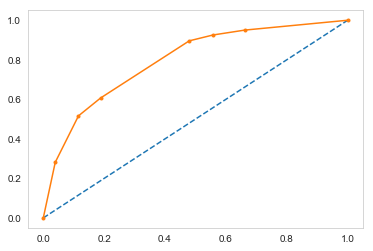

In [84]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.760


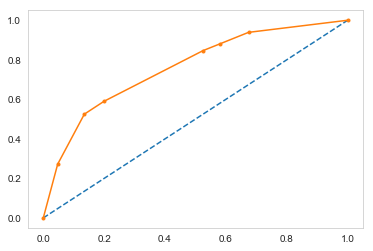

In [85]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Random Forest

In [86]:
ytrain_predict_rf = best_grid_rf.predict(x_train)
ytest_predict_rf = best_grid_rf.predict(x_test)

In [87]:
print(ytest_predict_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 1 1 1 1 

In [88]:
rf_train = confusion_matrix(train_labels, ytrain_predict_rf)
rf_train

array([[1128,  169],
       [ 248,  395]], dtype=int64)

In [89]:
rf_test = confusion_matrix(test_labels, ytest_predict_rf)
rf_test

array([[483,  88],
       [103, 158]], dtype=int64)

In [90]:
print(classification_report(train_labels,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1297
           1       0.70      0.61      0.65       643

    accuracy                           0.79      1940
   macro avg       0.76      0.74      0.75      1940
weighted avg       0.78      0.79      0.78      1940



In [91]:
print(classification_report(test_labels,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       571
           1       0.64      0.61      0.62       261

    accuracy                           0.77       832
   macro avg       0.73      0.73      0.73       832
weighted avg       0.77      0.77      0.77       832



AUC: 0.844


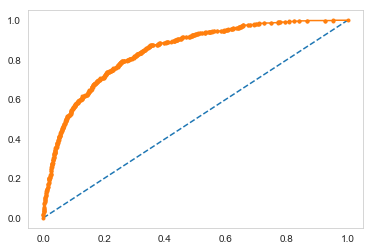

In [92]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_rf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.783


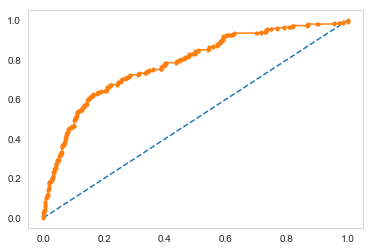

In [93]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_rf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Artificial Neural Network

In [94]:
ytrain_predict_ann = best_grid_ANN.predict(x_train)
ytest_predict_ann = best_grid_ANN.predict(x_test)

In [95]:
print(ytest_predict_ann)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1
 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 1 1 1 

In [96]:
ann_train = confusion_matrix(train_labels, ytrain_predict_ann)
ann_train

array([[1112,  185],
       [ 233,  410]], dtype=int64)

In [97]:
ann_test = confusion_matrix(test_labels, ytest_predict_ann)
ann_test

array([[468, 103],
       [106, 155]], dtype=int64)

In [98]:
print(classification_report(train_labels,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1297
           1       0.69      0.64      0.66       643

    accuracy                           0.78      1940
   macro avg       0.76      0.75      0.75      1940
weighted avg       0.78      0.78      0.78      1940



In [99]:
print(classification_report(test_labels,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       571
           1       0.60      0.59      0.60       261

    accuracy                           0.75       832
   macro avg       0.71      0.71      0.71       832
weighted avg       0.75      0.75      0.75       832



AUC: 0.835


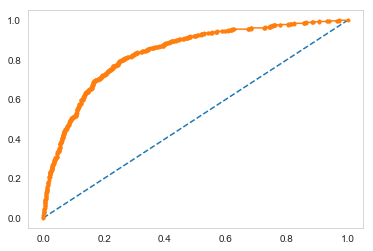

In [100]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_ANN.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.783


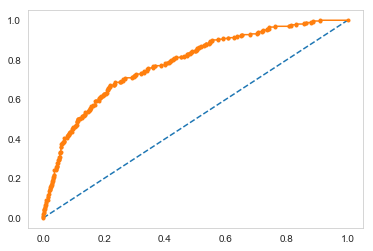

In [101]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_ANN.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

Inference from the above Confusion matrix, classification report, Auc and Roc Curve, we can conclude that, for Random Forest classifier has the Highest accuracy in both train and test data.


### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

### Business Insights
I strongly recommended we collect more real time unstructured data and past data if possible.

This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time and associating it with other external information such as  weather information, airline/vehicle types, etc.

* Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. 

* As per the data 90% of insurance is done by online channel. 


Key performance indicators (KPI) The KPI’s of insurance claims are: 

* Reduce claims cycle time

* Increase customer satisfaction

* Combat fraud 
